# DL 2: Implementing Feedforward neural networks with Keras and TensorFlow 

In [1]:
#a. Import the necessary packages 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# #b. Load the training and testing data (MNIST/CIFAR10)
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
with np.load(r"mnist_dataset.npz") as data:
    x_train = data["X_train"]
    y_train = data["y_train"]
    x_test = data["X_test"]
    y_test = data["y_test"]

print("Loaded MNIST dataset locally!")
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape) 

Loaded MNIST dataset locally!
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
# Normalize pixel values
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# c. Define the network architecture using Keras 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# d. Train the model using SGD 
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
# Train model for 10 epochs with validation
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8313 - loss: 0.6600 - val_accuracy: 0.9023 - val_loss: 0.3593
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9043 - loss: 0.3404 - val_accuracy: 0.9190 - val_loss: 0.2942
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9173 - loss: 0.2925 - val_accuracy: 0.9272 - val_loss: 0.2632
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9258 - loss: 0.2624 - val_accuracy: 0.9331 - val_loss: 0.2393
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9320 - loss: 0.2397 - val_accuracy: 0.9370 - val_loss: 0.2231
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9379 - loss: 0.2212 - val_accuracy: 0.9415 - val_loss: 0.2067
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9421 - loss: 0.2055 - val_accuracy: 0.9450 - val_loss: 0.1942
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9467 - loss: 0.192

In [8]:
# e. Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: 0.1634  
Test Accuracy: 0.953000009059906
Test Loss: 0.16343428194522858


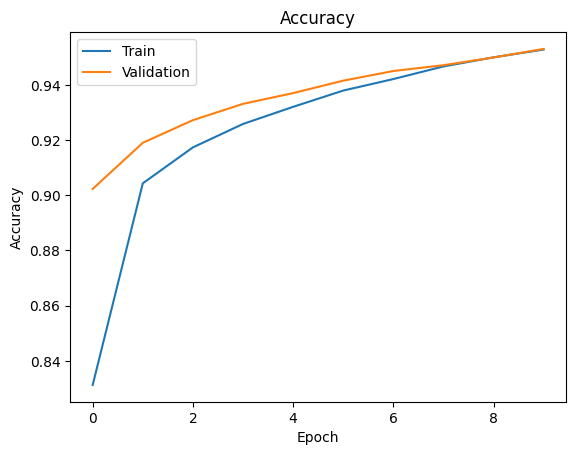

In [9]:
# Plot the training loss and accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

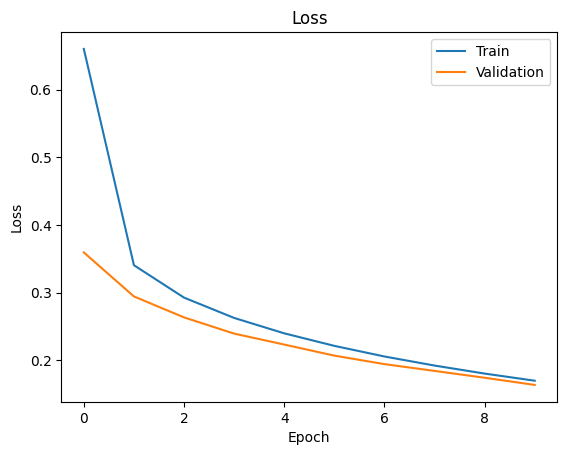

In [10]:
# f. Plot the training loss and accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

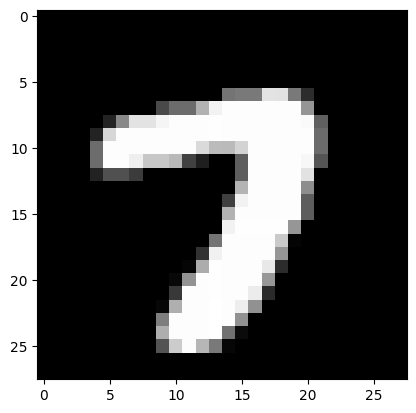

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Predicted digit: 7
Actual digit: 7


In [11]:
# Display sample prediction
index = np.random.randint(0,9999)
plt.imshow(x_test[index], cmap="gray")
plt.show()

prediction = model.predict(x_test)
print("Predicted digit:", np.argmax(prediction[index]))
print("Actual digit:", y_test[index])